# Unit 5 - Financial Planning


In [37]:
# Initial imports
# add json import
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [38]:
# Load .env enviroment variables
# Expect "True" output if this is done correctly
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [39]:
# Set monthly household income
monthly_household_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [40]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [41]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"
#execute get request on btc & eth & store response as variable
#requests.get(btc_url)
#requests.get(eth_url)
btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)
#use json function from json library to format
#import json, added to initial imports list
btc_data = btc_response_data.json()
eth_data = eth_response_data.json()
#add indents to JSON and output to screen for both btc & eth
print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18470625,
            "total_supply": 18470625,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11403.5,
                    "volume_24h": 20786290360,
                    "market_cap": 210717356356,
                    "percentage_change_1h": 0.193850919359366,
                    "percentage_change_24h": -2.91245009157236,
                    "percentage_change_7d": -7.08059554798472,
                    "percent_change_1h": 0.193850919359366,
                    "percent_change_24h": -2.91245009157236,
                    "percent_change_7d": -7.08059554798472
                }
            },
            "last_updated": 1598368431
        }
    },
    "metadata": {
        "timestamp": 1598368431,
        "num_cry

In [42]:
# Fetch current BTC price
# select current btc price from formatted json data
# use variable btc_price_current, keep "btc" at the beginning of all variables for quicker identification later
btc_price_current = float(btc_data['data']['1']['quotes']['USD']['price'])
# Fetch current ETH price
# select current eth price from formatted json data
#use variable eth_price_current, keep "eth" at the beginning of all variables for quicker identification
eth_price_current = float(eth_data['data']['1027']['quotes']['USD']['price'])
# Compute current value of my crpto
# values will equal my_btc*btc_price_current & my_eth*eth_price_current - set new variables
my_btc_value = my_btc*btc_price_current
my_eth_value = my_eth*eth_price_current

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13684.20
The current value of your 5.3 ETH is $2039.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [43]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [44]:
# Set Alpaca API key and secret
# add api_key var using .getenv
# print var type for each key: expect "str" output if key was imported correctly
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type <class 'str'>


In [101]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-24", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

                              AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-08-24 00:00:00-04:00  118.72  118.82  118.6  118.62  8887200  342.12   

                                                            
                          high       low   close    volume  
2020-08-24 00:00:00-04:00  343  339.4504  342.94  79073131  
Current AGG closing price: $118.62
Current SPY closing price: $342.94


In [46]:
# Compute the current value of shares
# my_value = shares*close_price
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17147.00
The current value of your 200 AGG shares is $23724.00


### Savings Health Analysis

In [138]:
#set two new variables for total amount of shares and total amount of crypto - my_shares_value & my_crypto_value
my_shares_value = my_agg_value+my_spy_value
my_crypto_value = my_btc_value+my_eth_value
# Create savings DataFrame
# Create dictionary "savings_value" Keys: amount, shares, crypto
savings_value = {   
    "amount":(my_shares_value,my_crypto_value),
    "shares": (my_shares_value),
    "crypto": (my_crypto_value)
}

# use savings_value dict and assign keys to index or columns
# index = "shares" & "crypto"
# columns = "amount"
df_savings = pd.DataFrame(savings_value, index=["shares", "crypto"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
shares,40871.000
crypto,15723.428


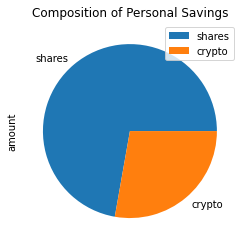

In [139]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [150]:
# Set ideal emergency fund
monthly_income = monthly_household_income
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_shares_value+my_crypto_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund-total_savings)} away from reaching your savings goal of ${emergency_fund}!")

Congratulations! You have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl)

### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")